# XGBoost Regression Solution
### Imports

In [ ]:
import h5py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import sklearn as skl
from matplotlib import pyplot as plt
from time import time

import shap



### Data Loading & Preprocessing

In [2]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        return pd.DataFrame(f[name][:])

train = load_data('train')
test  = load_data('test')
print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]


Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


In [4]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]
X = train[all_variables]
y = train['p_truth_E']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=16)

### Setting up XGBoost

In [5]:
def modelfit(alg, X, y, useTrainCV=True, cv_folds=5, early_stopping_rounds=50, plot_first=15, \
             X_test=X_test, y_test=y_test, plotting=False):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X.values, label=y.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='mae', early_stopping_rounds=early_stopping_rounds)
        best_nestimators = cvresult.shape[0]
        print(best_nestimators)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X, y, eval_metric='mae')

    #Predict training set:
    dtrain_predictions = alg.predict(X)

    #Predict test set:
    dtest_predictions  = alg.predict(X_test)
        
    #Print model report:
    print("\nModel Report")
    print("MAE Score (Train): %.4g" % skl.metrics.mean_absolute_error(y.values, dtrain_predictions))
    print("MAE Score (Test): %.4g"  % skl.metrics.mean_absolute_error(y_test.values, dtest_predictions))
    print("Explained Variance Score (Train): %f" % skl.metrics.explained_variance_score(y.values, dtrain_predictions))
    print("Explained Variance Score (Test): %f"  % skl.metrics.explained_variance_score(y_test.values, dtest_predictions))
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    if plotting:
        fig=plt.figure(figsize=(10,6))
        feat_imp[:plot_first].plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

    if useTrainCV:
        return best_nestimators, feat_imp

In [6]:
begin = time()
xgb1 = XGBRegressor(
 learning_rate    = 0.1,
 n_estimators     = 1000,
 max_depth        = 5,
 min_child_weight = 1,
 gamma            = 0,
 subsample        = 0.8,
 colsample_bytree = 0.8,
 objective        = 'reg:squarederror',
 scale_pos_weight = 1,
 seed             = 16,
 n_jobs           = -1)
best_nestimators, feature_importance = modelfit(xgb1, X_train, y_train, plot_first=12)
print('Make fit: ', time()-begin)

284

Model Report
MAE Score (Train): 5460
MAE Score (Test): 6107
Explained Variance Score (Train): 0.949226
Explained Variance Score (Test): 0.927022
Make fit:  1695.239917755127


### Feature Importance with Shapley

In [7]:
explainer = shap.TreeExplainer(xgb1)
shap_values = explainer.shap_values(X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


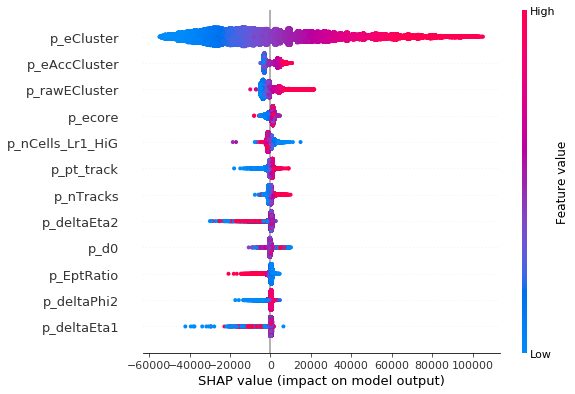

In [8]:
x = shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, max_display=12, sort=True)

In [9]:
shapley_sum = np.abs(shap_values).mean(axis=0)
importance  = pd.DataFrame([X_train.columns.tolist(), shapley_sum.tolist()]).T
importance.columns = ['column_name', 'shapley_importance']
importance  = importance.sort_values('shapley_importance', ascending=False)
best_features = importance['column_name'].tolist()[:10]
importance.head(12)

,column_name,shapley_importance
22,p_eCluster,26758.4
33,p_eAccCluster,3373.43
25,p_rawECluster,2993.61
99,p_ecore,1322.9
115,p_nCells_Lr1_HiG,1213.5
8,p_pt_track,900.705
7,p_nTracks,875.396
84,p_deltaEta2,814.11
14,p_d0,800.715
17,p_EptRatio,759.169


In [10]:
print('Number of features common in Shapley Values and XGB feature_importance:', len(set(feature_importance.keys()[:15]).intersection(best_features)))
X_best = X[best_features]
X_btrain, X_btest, y_train, y_test = train_test_split(X_best, y, test_size=.25, random_state=16)
print(X_btrain.shape)

Number of features common in Shapley Values and XGB feature_importance: 6
(91121, 10)


### Hyperparameter Optimization
__We want to optimize the following parameters:__ n_estimators, max_depth, min_child_weight, learning rate (-> n_estimators again) <br>
__Round 1:__ Recalibrating Number of Estimators for new parameter set

In [11]:
# Define dictionaries for kwargs vectors holding standard/optimized parameters and optimizers, parameters to be optimized in the current step
parameters = {'n_estimators': 1000, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0}

In [12]:
begin = time()
xgb2 = XGBRegressor(
 learning_rate    = 0.1,
 **parameters,
 subsample        = 0.8,
 colsample_bytree = 0.8,
 objective        = 'reg:squarederror',
 scale_pos_weight = 1,
 seed             = 16,
 n_jobs           = -1)
parameters['n_estimators'], feature_importance = modelfit(xgb2, X_btrain, y_train, useTrainCV=True, \
                                                X_test = X_btest, y_test = y_test)
print('Make fit: ', time()-begin)

95

Model Report
MAE Score (Train): 6257
MAE Score (Test): 6453
Explained Variance Score (Train): 0.927847
Explained Variance Score (Test): 0.919444
Make fit:  77.77449703216553


#### Bayesian Setup

In [13]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def XGB_CrossValidation(data, targets, parameters):
    """Decision Tree cross validation.
       Fits a Decision Tree with the given paramaters to the target 
       given data, calculated a CV accuracy score and returns the mean.
       The goal is to find combinations of max_depth, min_samples_leaf 
       that maximize the accuracy
    """
    
    estimator = XGBRegressor(
                     learning_rate    = 0.1,
                     **parameters,
                     subsample        = 0.8,
                     colsample_bytree = 0.8,
                     objective        = 'reg:squarederror',
                     scale_pos_weight = 1,
                     seed             = 21)
    
    cval = cross_val_score(estimator, data, targets, scoring='explained_variance', cv=5, n_jobs=-1)
    
    return cval.mean()

In [14]:
def optimize_XGB(data, targets, pars, parameters, n_iter=5):
    """Apply Bayesian Optimization to Decision Tree parameters."""
    
    def crossval_wrapper(max_depth=-1000, min_child_weight=-1000, gamma=-1000, parameters=parameters):
        """Wrapper of Decision Tree cross validation. 
           Notice how we ensure max_depth, min_samples_leaf 
           are casted to integer before we pass them along.
        """
        if max_depth != -1000:
            parameters['max_depth'] = int(max_depth)
        if min_child_weight != -1000:
            parameters['min_child_weight'] = int(min_child_weight)
        if gamma != -1000:
            parameters['gamma'] = gamma
        return XGB_CrossValidation(data=data, 
                                   targets=targets,
                                   parameters=parameters)

    optimizer = BayesianOptimization(f=crossval_wrapper, 
                                     pbounds=pars, 
                                     random_state=21, 
                                     verbose=2)
    optimizer.maximize(init_points=4, n_iter=n_iter)

    return optimizer

__Round 2:__ Tuning max_depth and min_child_weight with BayesianSearch

In [15]:
parameters_BayesianOptimization = {"max_depth": (4, 14), 
                                   "min_child_weight": (1, 8)
                                  }
start = time()
BayesianOptimization_depth_weight = optimize_XGB(X_btrain, 
                                                 y_train, 
                                                 parameters_BayesianOptimization,
                                                 parameters,
                                                 n_iter=10)
print('Bay Time: ', time()-start)
print(BayesianOptimization_depth_weight.max)

|   iter    |  target   | max_depth | min_ch... |
-------------------------------------------------
|  1        |  0.9162   |  4.487    |  3.024    |
|  2        |  0.912    |  11.21    |  1.151    |
|  3        |  0.916    |  6.059    |  1.355    |
|  4        |  0.9155   |  7.023    |  5.647    |
|  5        |  0.9163   |  4.008    |  7.99     |
|  6        |  0.9162   |  4.005    |  1.029    |
|  7        |  0.9163   |  4.001    |  7.979    |
|  8        |  0.9163   |  4.032    |  8.0      |
|  9        |  0.9162   |  4.014    |  1.009    |
|  10       |  0.9163   |  4.003    |  7.962    |
|  11       |  0.9162   |  4.003    |  1.036    |
|  12       |  0.9163   |  4.006    |  7.985    |
|  13       |  0.9163   |  4.022    |  7.971    |
|  14       |  0.9162   |  4.01     |  1.052    |
Bay Time:  551.272617816925
{'target': 0.9163497924804688, 'params': {'max_depth': 4.008337418922821, 'min_child_weight': 7.9904776646804825}}


In [16]:
parameters['max_depth'] = int(np.round(BayesianOptimization_depth_weight.max['params']['max_depth']))
parameters['min_child_weight'] = int(np.round(BayesianOptimization_depth_weight.max['params']['min_child_weight']))
begin = time()
xgb2 = XGBRegressor(
 learning_rate    = 0.1,
 **parameters,
 subsample        = 0.8,
 colsample_bytree = 0.8,
 objective        = 'reg:squarederror',
 scale_pos_weight = 1,
 seed             = 16,
 n_jobs           = -1)
modelfit(xgb2, X_btrain, y_train, useTrainCV=False, X_test=X_btest, y_test=y_test)
print('Make fit: ', time()-begin)


Model Report
MAE Score (Train): 6377
MAE Score (Test): 6455
Explained Variance Score (Train): 0.922504
Explained Variance Score (Test): 0.919827
Make fit:  9.999855995178223


__Round 3:__ Reducing learning_rate and finding new number of estimators with CV

In [18]:
parameters['n_estimators'] = 5000
begin = time()
xgb3 = XGBRegressor(
 learning_rate    = 0.01,
 **parameters,
 subsample        = 0.8,
 colsample_bytree = 0.8,
 objective        = 'reg:squarederror',
 scale_pos_weight = 1,
 seed             = 16,
 n_jobs           = -1)
parameters['n_estimators'], feature_imp = modelfit(xgb3, X_btrain, y_train, plot_first=10, X_test=X_btest, y_test=y_test)
print('Make fit: ', time()-begin)

1139

Model Report
MAE Score (Train): 6335
MAE Score (Test): 6434
Explained Variance Score (Train): 0.923511
Explained Variance Score (Test): 0.920060
Make fit:  557.7414846420288


## Predicting Training Data

In [19]:
print(parameters)

{'n_estimators': 1139, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 0}


In [28]:
X_training = X[best_features]
y_training = train['p_truth_E'].loc[electron_indices]
X_testing = pd.DataFrame(StandardScaler().fit_transform(test[best_features]))
X_testing.columns = best_features
xgb_final = XGBRegressor(
 learning_rate    = 0.01,
 **parameters,
 subsample        = 0.8,
 colsample_bytree = 0.8,
 objective        = 'reg:squarederror',
 scale_pos_weight = 1,
 seed             = 16)

#Fit the algorithm on the data
xgb_final.fit(X_training, y_training, eval_metric='mae')

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             n_estimators=1139, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=16, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=16, subsample=0.8,
             tree_method=None, validate_parameters=False, verbosity=None)

In [29]:
#Predict test set:
dtest_predictions  = xgb_final.predict(X_testing)

In [30]:
print(dtest_predictions)

[ 84122.87  87682.54 233107.61 ... 122171.08 100153.97 157836.7 ]


In [31]:
pd.Series(dtest_predictions).to_csv('Regression_LaurentLindpointner_XGBoost.txt', header=False)
pd.Series(best_features).to_csv('Regression_LaurentLindpointner_XGBoost_VariableList.txt', index=False, header=False)